# Explore steps for ML Template

## Libraries Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import helper_func_EDA

In [3]:
from helper_func_preprocess import *

In [4]:
%matplotlib inline

In [5]:
%reload_ext helper_func_EDA

In [6]:
%reload_ext helper_func_preprocess

## Load Environment

In [7]:
%run env.py

In [8]:
INPUT_DATA_PATH
QUANTILE_LIST

'/Users/prb000j/OneDrive - Walmart Inc/Python Learn Projects/Python Projects/ML_Templates/input_data/'

[0.01, 0.03, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.97, 0.99]

## Read data

In [9]:
data_raw = pd.read_csv(INPUT_DATA_PATH + 'train.csv', index_col='Id')
data_raw.shape
data_raw.head(3)

(1460, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [10]:
data_raw.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Object of class EDA instantiated

In [11]:
target_feature = 'SalePrice'
EDA_obj = helper_func_EDA.EDA(data_raw, target_feature)

In [12]:
EDA_obj.target_feature

'SalePrice'

## Basic EDA

### EDA of target data

In [13]:
EDA_obj.df[EDA_obj.target_feature].describe(QUANTILE_LIST).to_frame().T

,count,mean,std,min,1%,3%,5%,10%,25%,50%,75%,90%,95%,97%,99%,max
SalePrice,1460.0,180921.19589,79442.502883,34900.0,61815.97,82000.0,88000.0,106475.0,129975.0,163000.0,214000.0,278000.0,326100.0,374230.0,442567.01,755000.0


In [14]:
type(EDA_obj.df[EDA_obj.target_feature])

pandas.core.series.Series

In [15]:
EDA_obj.df[EDA_obj.target_feature].isna().sum()

0

### EDA of features

In [16]:
catg_features = EDA_obj.df.select_dtypes(include='object').columns.to_list()
numeric_features = EDA_obj.df.select_dtypes(exclude='object').columns.to_list()
len(catg_features)
len(numeric_features)
EDA_obj.df[catg_features].head(3)
EDA_obj.df[numeric_features].head(3)

43

37

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [17]:
cols_w_manyNAs = EDA_obj.getColsWithManyNAs()
cols_w_manyNAs

NA count is at least 730 rows out of 1460 | 50.00%


['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [18]:
EDA_obj.df[cols_w_manyNAs].isna().sum()

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [19]:
{col: EDA_obj.df[col].value_counts() for col in cols_w_manyNAs}

{'Alley': Grvl    50
 Pave    41
 Name: Alley, dtype: int64,
 'PoolQC': Gd    3
 Ex    2
 Fa    2
 Name: PoolQC, dtype: int64,
 'Fence': MnPrv    157
 GdPrv     59
 GdWo      54
 MnWw      11
 Name: Fence, dtype: int64,
 'MiscFeature': Shed    49
 Othr     2
 Gar2     2
 TenC     1
 Name: MiscFeature, dtype: int64}

In [20]:
{col: EDA_obj.df[col].unique() for col in catg_features if EDA_obj.df[col].nunique() < 20}

{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'Street': array(['Pave', 'Grvl'], dtype=object),
 'Alley': array([nan, 'Grvl', 'Pave'], dtype=object),
 'LotShape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object),
 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 'Condition2': array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
       dtype=object),
 'BldgType': array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object),
 'HouseStyle': array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
        '2.5Fin'], dtype=object),
 'RoofStyle': array(['Gable', 'Hip', 'Gambrel', 'Mansard'

In [21]:
## some features resemble a numeric column; however, we need to treat them as a categorical
{col: EDA_obj.df[col].nunique() for col in numeric_features if EDA_obj.df[col].nunique()<50}
pseudo_catg_features = [col for col in numeric_features if EDA_obj.df[col].nunique()<50]
len(pseudo_catg_features)

{'MSSubClass': 15,
 'OverallQual': 10,
 'OverallCond': 9,
 'LowQualFinSF': 24,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'TotRmsAbvGrd': 12,
 'Fireplaces': 4,
 'GarageCars': 5,
 '3SsnPorch': 20,
 'PoolArea': 8,
 'MiscVal': 21,
 'MoSold': 12,
 'YrSold': 5}

18

### Bi variate analysis

#### Deviation in target explained by Cols

In [22]:
len(cols_w_manyNAs)

4

In [23]:
len(pseudo_catg_features)

18

In [24]:
len(catg_features)

43

In [25]:
feature_lists = [pseudo_catg_features, catg_features, cols_w_manyNAs]
cols_w_low_dev = EDA_obj.getCols_w_lowDev(feature_lists)
print(f"cols with low deviation: {cols_w_low_dev}")

number of cols with low dev: 3
cols with low deviation: ['MoSold', 'YrSold', 'BsmtHalfBath']


#### Multi collinearity between features

In [26]:
EDA_obj.target_feature

'SalePrice'

In [27]:
len(numeric_features)
numeric_features_upd = list(set(numeric_features).difference(set(pseudo_catg_features + [target_feature])))
len(numeric_features_upd)

37

18

In [28]:
corr_df, h_corr_pair = EDA_obj.getRankedCorr(numeric_features_upd)
corr_df.shape
corr_df.head(10)
f"Corr threshold: {EDA_obj.CORR_THRESH}"

len(h_corr_pair)
h_corr_pair

(153, 2)

,feature_pair,corr_val
0,GarageYrBlt__YearBuilt,0.825667
1,1stFlrSF__TotalBsmtSF,0.819530
2,GrLivArea__2ndFlrSF,0.687501
3,GarageYrBlt__YearRemodAdd,0.642277
4,YearRemodAdd__YearBuilt,0.592855
5,GrLivArea__1stFlrSF,0.566024
6,GarageYrBlt__GarageArea,0.564567
7,TotalBsmtSF__BsmtFinSF1,0.522396
8,BsmtFinSF1__BsmtUnfSF,-0.495251
9,1stFlrSF__GarageArea,0.489782


'Corr threshold: 0.7'

2

['GarageYrBlt__YearBuilt', '1stFlrSF__TotalBsmtSF']

In [29]:
multi_coll_featr = EDA_obj.getMultiCollFeatr(numeric_features_upd)
multi_coll_featr

{'GarageYrBlt': 0.4863616774878608, 'YearBuilt': 0.5228973328794969}
{'1stFlrSF': 0.6058521846919147, 'TotalBsmtSF': 0.6135805515591956}


['GarageYrBlt', '1stFlrSF']

In [30]:
EDA_obj.corr_df.shape

(153, 2)

## Round 1 - feature selection

In [31]:
PP_obj = PreProcess(df=EDA_obj.df, target_fetaure=EDA_obj.target_feature,
        numeric_features=numeric_features_upd, catg_features=catg_features, 
        cols_w_manyNAs=cols_w_manyNAs, cols_w_low_dev=cols_w_low_dev,
        multi_coll_featr=multi_coll_featr)

Properties of the DF
Shape of df: (1460, 80)
Target Feature: SalePrice


In [32]:
PP_obj.cols_to_drop

['Alley', 'Fence', 'MiscFeature', 'YrSold', 'BsmtHalfBath', 'PoolQC', 'MoSold']

In [33]:
len(PP_obj.catg_features_upd)
len(PP_obj.numeric_features_upd)

39

16

In [34]:
PP_obj.preProcessData()

Shape of X: (1460, 55)
Shape of y: (1460,)
Shape of train & test datasets are as follows:
(1168, 55) (292, 55) (1168,) (292,)
cols outlier transformed: 16 out of 16 successfully
cols outlier transformed: 16 out of 16 successfully
comb encd + num func: (1168, 55)
len of op cols for OHE: 106
comb encd + num func: (292, 55)


## Split data into train & test

In [35]:
PP_obj.X_train.head(3)
PP_obj.X_test.head(3)

PP_obj.y_train.head(3)
PP_obj.y_test.head(3)

,BsmtExposure,Neighborhood,Street,Exterior1st,BsmtQual,ExterQual,GarageCond,MasVnrType,Heating,GarageFinish,...,GrLivArea,YearBuilt,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,BsmtUnfSF,GarageArea,OpenPorchSF,MasVnrArea,BsmtFinSF2
Id,,,,,,,,,,,,,,,,,,,,,
619,Av,NridgHt,Pave,CemntBd,Ex,Ex,TA,BrkFace,GasA,Unf,...,1828,2007,1822,48,0,1774,774,108,452.0,0
871,No,NAmes,Pave,MetalSd,TA,TA,TA,None,GasA,Unf,...,894,1962,894,0,0,894,308,0,0.0,0
93,No,Crawfor,Pave,Wd Sdng,Gd,TA,TA,None,GasA,Unf,...,964,1921,876,713,0,163,432,0,0.0,0


,BsmtExposure,Neighborhood,Street,Exterior1st,BsmtQual,ExterQual,GarageCond,MasVnrType,Heating,GarageFinish,...,GrLivArea,YearBuilt,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,BsmtUnfSF,GarageArea,OpenPorchSF,MasVnrArea,BsmtFinSF2
Id,,,,,,,,,,,,,,,,,,,,,
530,No,Crawfor,Pave,Wd Sdng,TA,Gd,TA,NaN,GasA,RFn,...,2515,1957,2035,1219,0,816,484,0,NaN,0
492,No,NAmes,Pave,Wd Sdng,TA,TA,TA,None,GasA,Unf,...,1578,1941,806,403,620,238,240,0,0.0,165
460,No,BrkSide,Pave,MetalSd,TA,TA,TA,BrkCmn,GasA,Unf,...,1203,1950,709,185,224,524,352,0,161.0,0


Id
619    314813
871    109500
93     163500
Name: SalePrice, dtype: int64

Id
530    200624
492    133000
460    110000
Name: SalePrice, dtype: int64

## Separating Catg & Numeric features

In [36]:
f"cnt of catg features: {len(PP_obj.catg_features_upd)}"
f"cnt of num features: {len(PP_obj.numeric_features_upd)}"

'cnt of catg features: 39'

'cnt of num features: 16'

## Preprocessing data - Numeric features

### Handling outliers in data

### Handling missing data 

In [37]:
PP_obj.X_train_na_imp.shape
PP_obj.X_test_na_imp.shape

(1168, 55)

(292, 55)

## Preprocessing data - Catg features

### Handling missing data 

### Encoding Catg features

#### Form of labeling / One hot encoding

In [38]:
PP_obj.X_train_na_imp.isna().sum().sum()

0

In [39]:
PP_obj.cols_for_target_encd

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [40]:
PP_obj.X_train_na_imp.shape
# PP_obj.X_train_na_imp.head(3)

PP_obj.X_test_na_imp.shape
# PP_obj.X_test_na_imp.head(3)

(1168, 55)

(292, 55)

In [41]:
PP_obj.X_train_bkt.shape
# PP_obj.X_train_bkt.head(3)

PP_obj.X_test_bkt.shape
# PP_obj.X_test_bkt.head(3)

(1168, 55)

(292, 55)

In [42]:
PP_obj.X_train_enc.shape
PP_obj.X_train_enc.head(3)

PP_obj.X_test_enc.shape
PP_obj.X_test_enc.head(3)

(1168, 122)

,WoodDeckSF,ScreenPorch,LotArea,LotFrontage,YearRemodAdd,EnclosedPorch,GrLivArea,YearBuilt,TotalBsmtSF,BsmtFinSF1,...,HouseStyle_1.5Fin,MSZoning_RL,MSZoning_Other,MSZoning_RM,BsmtFinType2_Unf,BsmtFinType2_Other,BsmtCond_TA,BsmtCond_Other,RoofMatl_CompShg,RoofMatl_Other
0,12.0,260.0,11694.0,90.0,2007.0,22.8,1828.0,2007.0,1822.0,48.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,12.0,40.0,6600.0,60.0,1962.0,22.8,894.0,1962.0,894.0,30.9,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,12.0,40.0,13360.0,80.0,2006.0,44.0,964.0,1921.0,876.0,713.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


(292, 122)

,WoodDeckSF,ScreenPorch,LotArea,LotFrontage,YearRemodAdd,EnclosedPorch,GrLivArea,YearBuilt,TotalBsmtSF,BsmtFinSF1,...,HouseStyle_1.5Fin,MSZoning_RL,MSZoning_Other,MSZoning_RM,BsmtFinType2_Unf,BsmtFinType2_Other,BsmtCond_TA,BsmtCond_Other,RoofMatl_CompShg,RoofMatl_Other
0,12.0,40.0,32668.0,69.0,1975.0,200.0,2515.0,1957.0,2035.0,1219.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,12.0,40.0,9490.0,79.0,1950.0,32.0,1578.0,1941.0,806.0,403.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,12.0,40.0,7015.0,69.0,1950.0,248.0,1203.0,1950.0,709.0,185.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


#### Target encoding

In [43]:
PP_obj.cols_for_target_encd

[PP_obj.X_train_enc.columns[PP_obj.X_train_enc.columns.str.contains(pat)].to_list() \
     for pat in PP_obj.cols_for_target_encd]

['Neighborhood', 'Exterior1st', 'Exterior2nd']

[['Neighborhood_Other', 'Neighborhood_NAmes'],
 ['Exterior1st_Other',
  'Exterior1st_MetalSd',
  'Exterior1st_Wd Sdng',
  'Exterior1st_VinylSd',
  'Exterior1st_HdBoard'],
 ['Exterior2nd_Other',
  'Exterior2nd_MetalSd',
  'Exterior2nd_Wd Sdng',
  'Exterior2nd_VinylSd',
  'Exterior2nd_Plywood',
  'Exterior2nd_HdBoard']]

In [44]:
# {col: PP_obj.X_train_enc[col].value_counts(normalize=True) for col in PP_obj.cols_for_target_encd}

## Scaling Data

In [45]:
PP_obj.X_train_sc.shape
PP_obj.X_train_sc.head(3)

(1168, 122)

,WoodDeckSF,ScreenPorch,LotArea,LotFrontage,YearRemodAdd,EnclosedPorch,GrLivArea,YearBuilt,TotalBsmtSF,BsmtFinSF1,...,HouseStyle_1.5Fin,MSZoning_RL,MSZoning_Other,MSZoning_RM,BsmtFinType2_Unf,BsmtFinType2_Other,BsmtCond_TA,BsmtCond_Other,RoofMatl_CompShg,RoofMatl_Other
0,0.0,0.58464,0.280667,0.585626,1.000000,0.000000,0.536014,1.000000,0.850762,0.011056,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.00000,0.137895,0.319432,0.210526,0.000000,0.200916,0.666667,0.417443,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.00000,0.327360,0.496894,0.982456,0.065432,0.226030,0.362963,0.409038,0.440998,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


### Test new data input

In [46]:
new_df = data_raw.drop(target_feature, axis=1).sample(100)
new_df.shape
new_df.head(3)

(100, 79)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
819,80,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
230,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
1110,20,RL,107.0,11362,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal


In [47]:
new_df_sc = PP_obj.preProcessData(new_df, new_data=True)
new_df_sc.shape
new_df_sc.head(3)

cols outlier transformed: 16 out of 16 successfully
comb encd + num func: (100, 55)


(100, 122)

,WoodDeckSF,ScreenPorch,LotArea,LotFrontage,YearRemodAdd,EnclosedPorch,GrLivArea,YearBuilt,TotalBsmtSF,BsmtFinSF1,...,HouseStyle_1.5Fin,MSZoning_RL,MSZoning_Other,MSZoning_RM,BsmtFinType2_Unf,BsmtFinType2_Other,BsmtCond_TA,BsmtCond_Other,RoofMatl_CompShg,RoofMatl_Other
0,0.000000,0.0,0.200004,0.496894,0.368421,0.0,0.257603,0.733333,0.471608,0.305873,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.230228,0.0,0.042097,0.168589,0.982456,0.0,0.438068,0.985185,0.641106,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.198594,0.0,0.271362,0.736469,0.964912,0.0,0.538884,0.977778,0.857299,0.651766,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Feature reduction 
t-SNE or PCA or embeddings

In [48]:
temp_X = PP_obj.X_test_dim_reduc.copy()
temp_y = PP_obj.y_test.copy()
temp_X.shape
temp_y.shape

(292, 2)

(292,)

In [49]:
n_components=2
dim_red_result_df = temp_X.copy()
dim_red_cols = [f"FACT_{i+1}" for i in range(n_components)]
dim_red_cols

['FACT_1', 'FACT_2']

In [50]:
temp_df = temp_X.copy()
temp_df['label'] = temp_y.reset_index(drop=True)
temp_df.corr()['label']

FACT_1   -0.683816
FACT_2   -0.545269
label     1.000000
Name: label, dtype: float64

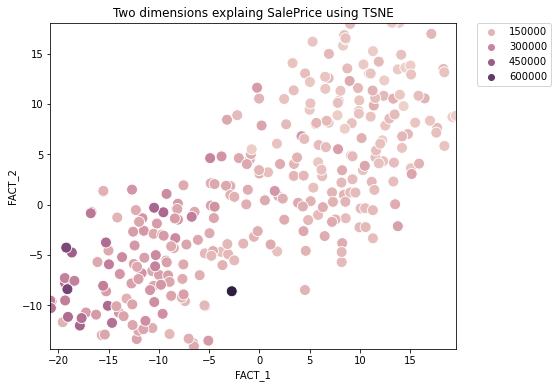

In [51]:
PP_obj.dimReducPlot(df=temp_X, y=temp_y)

## Initialize set of models

### Model training

In [52]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor

In [56]:
# model = LogisticRegressionCV(cv=5, random_state=0, )
model = RandomForestRegressor(random_state=0, )
model.fit(PP_obj.X_train_sc, PP_obj.y_train)
y_predict = model.predict(PP_obj.X_test_sc)

RandomForestRegressor(random_state=0)

### Test prediction & model evaluation

In [54]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [57]:
metrics = [mean_absolute_percentage_error, mean_squared_error, r2_score]
for metric in metrics:
    print(f"{metric.__name__}: {metric(PP_obj.y_test, y_predict):.4f}")

mean_absolute_percentage_error: 0.1043
mean_squared_error: 1321362171.6831
r2_score: 0.8087


### Voting or Ensemble

## Saving pipeline / model

## Using an existing pre-trained model

### Load pipeline/ model

### Load new data

### Use pipeline to pre-process new data

### Predict using pre-processed new data

## Feedback mechanism 
For continuous improvement

# End of analysis